In [100]:
import numpy as np
from preprocessing import LDA
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [6,8],
    [9,5],
    [8,7],
    [10,8],
]

data=np.concatenate([
    data_1,
    data_2
])

label = np.hstack((np.zeros(len(data_1)), np.ones(len(data_2))))  # 클래스 레이블 생성


In [102]:
data[label == 0]

array([[4, 1],
       [2, 4],
       [2, 3],
       [3, 6],
       [4, 4]])

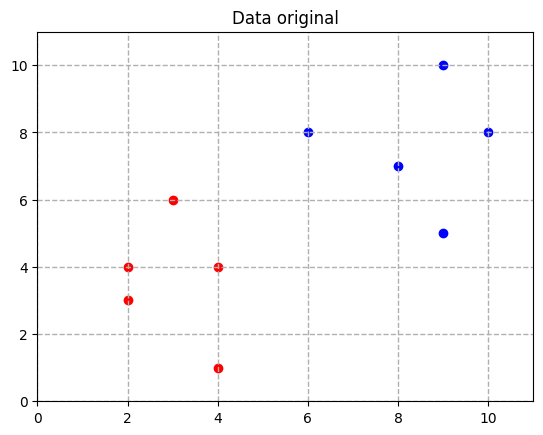

In [103]:
# x1과 x2의 최소값과 최대값 계산
min_x = min(0, 11)
max_x = max(0, 11)

# 축 범위 설정
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
plt.scatter(data[label == 0, 0], data[label == 0, 1], color="r")
plt.scatter(data[label == 1, 0], data[label == 1, 1], color="b")
# plt.scatter(u1[0], u1[1], color="g")
# plt.scatter(u2[0], u2[1], color="g")

plt.grid(True, linestyle='--', linewidth=1)
plt.title("Data original")
plt.savefig("./fig/binary original data.png")
plt.show()

In [104]:
custom_LDA = LDA(data, label)
custom_LDA.fit_eigen(1)
result = custom_LDA()

In [105]:
print("projection 결과\n", result)
print()
print("vector 결과\n", custom_LDA.vector)

projection 결과
 [[ 4.07118849]
 [ 3.41092352]
 [ 3.0179723 ]
 [ 5.11638527]
 [ 5.25004215]
 [12.20554606]
 [ 8.66096567]
 [10.24078996]
 [10.10713308]
 [12.33920294]]

vector 결과
 [[0.91955932]
 [0.39295122]]


In [106]:
x1 = np.array(data_1)
x2 = np.array(data_2)

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1) 

x_combined = np.vstack(((x1), (x2)))
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2))))
lda.fit(x_combined, y_combined)
x_lda = lda.transform(x_combined)

In [108]:
from preprocessing import get_angle_in_degrees
angle_list = []
custom_lda_vector= custom_LDA.vector.T
sklearn_lda_vector = lda.scalings_.T
for v1, v2 in zip(custom_lda_vector, sklearn_lda_vector):
    print("Custom vecotr : ", v1)
    print("Sklearn vecotr : ", v2)
    a = get_angle_in_degrees(v1, v2)
    print(f"Custom PCA, sklearn 이루는 각도 : ", a)

Custom vecotr :  [0.91955932 0.39295122]
Sklearn vecotr :  [0.70402034 0.3008459 ]
Custom PCA, sklearn 이루는 각도 :  0.0


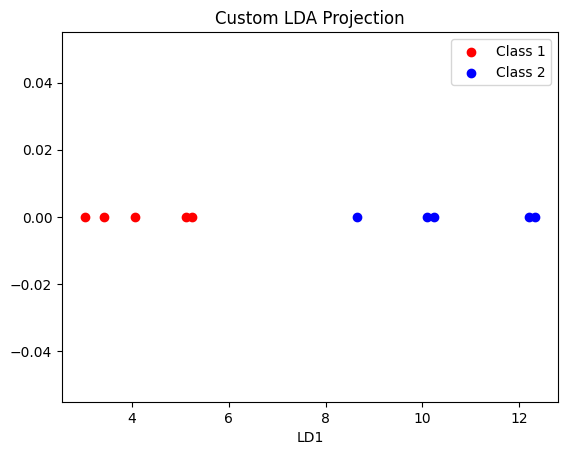

In [114]:
plt.scatter(result[label == 0], np.zeros(5), color='r', label='Class 1')
plt.scatter(result[label == 1], np.zeros(5), color='b', label='Class 2')
plt.legend()
plt.title('Custom LDA Projection')
plt.xlabel('LD1')
plt.savefig("./fig/binary Custom projection.png")
plt.show()

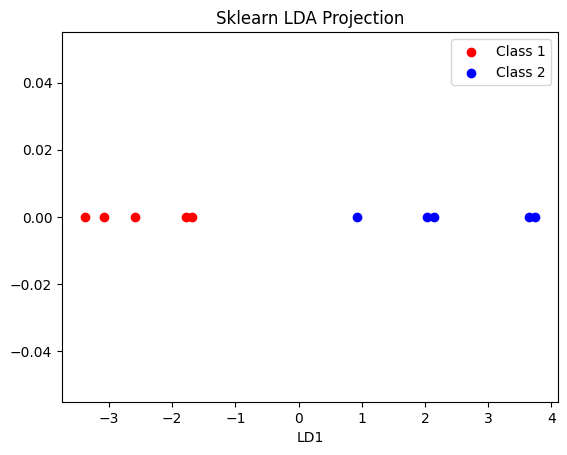

In [115]:
plt.scatter(x_lda[y_combined == 0], np.zeros(len(x1)), color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1], np.zeros(len(x2)), color='b', label='Class 2')
plt.legend()
plt.title('Sklearn LDA Projection')
plt.xlabel('LD1')
plt.savefig("./fig/binary Sklearn projection.png")
plt.show()

# Multi Classifier

In [119]:
data_1 = [
    [4,1],
    [2,4],
    [2,3],
    [3,6],
    [4,4],
]


data_2 = [
    [9,10],
    [7,8],
    [9,5],
    [8,7],
    [10,8],
]

data_3 = [
    [5, 17],
    [3, 13],
    [5, 15],
    [4, 19],
    [4, 14],
]
x1 = np.array(data_1)
x2 = np.array(data_2)
x3 = np.array(data_3)

data=np.concatenate([
    data_1,
    data_2,
    data_3
])


label = np.hstack((np.zeros(len(data_1)), np.ones(len(data_2)), np.ones(len(data_2)) * 2))  # 클래스 레이블 생성

In [120]:
label

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.])

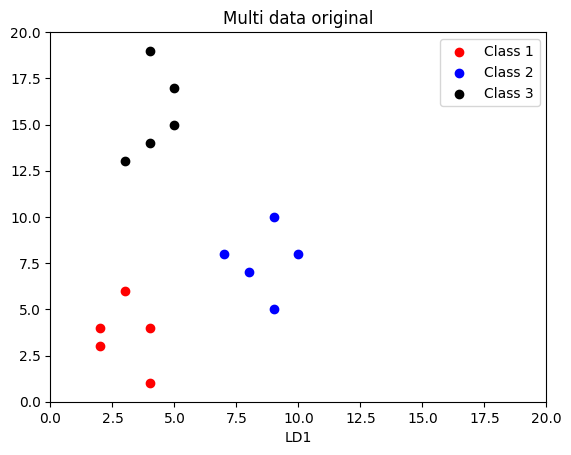

In [132]:
import matplotlib.pyplot as plt


plt.xlim(0, 20)
plt.ylim(0, 20)

plt.scatter(data[label == 0, 0], data[label == 0, 1], color='r', label='Class 1')
plt.scatter(data[label == 1, 0], data[label == 1, 1], color='b', label='Class 2')
plt.scatter(data[label == 2, 0], data[label == 2, 1], color='k', label='Class 3')


plt.legend()
plt.title('Multi data original')
plt.xlabel('LD1')
plt.savefig("./fig/multi original data.png")
plt.show()

In [123]:
from preprocessing import LDA

custom_LDA = LDA(data, label)

In [124]:
custom_LDA.fit_eigen(2)
result =  custom_LDA()
result

array([[  2.7170391 ,  -4.11132562],
       [ -0.6360536 ,  -3.15860118],
       [ -0.06617556,  -2.84347593],
       [ -0.9540804 ,  -4.73790177],
       [  1.00740497,  -5.05670136],
       [  1.69678315, -11.69270331],
       [  1.19308066,  -9.16435263],
       [  4.54617336, -10.11707707],
       [  2.58468799,  -9.79827748],
       [  3.65826851, -12.01150291],
       [ -5.57928028, -10.10237968],
       [ -4.94322669,  -6.9437785 ],
       [ -4.4395242 ,  -9.47212919],
       [ -7.54076565,  -9.78358009],
       [ -4.69137544,  -8.20795384]])

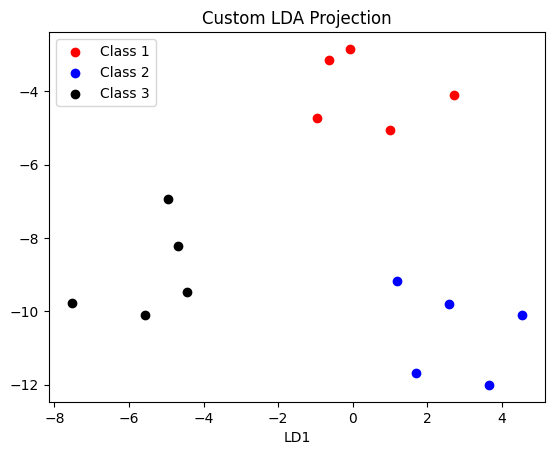

In [130]:
import matplotlib.pyplot as plt

plt.scatter(result[label == 0, 0], result[label == 0, 1], color='r', label='Class 1')
plt.scatter(result[label == 1, 0], result[label == 1, 1], color='b', label='Class 2')
plt.scatter(result[label == 2, 0], result[label == 2, 1], color='k', label='Class 3')


plt.legend()
plt.title('Custom LDA Projection')
plt.xlabel('LD1')
plt.savefig("./fig/multi Custom projection.png")
plt.show()

# LDA Sklearn Ex

Text(0.5, 23.52222222222222, 'LD1')

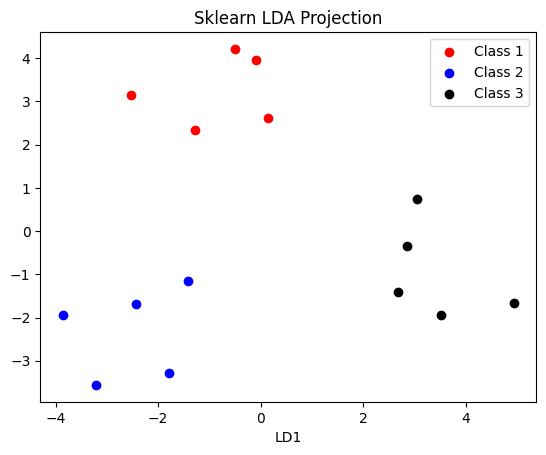

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

y_3 = np.zeros(len(x3)) + 2
y_combined = np.hstack((np.zeros(len(x1)), np.ones(len(x2)), y_3))  # 클래스 레이블 생성

lda.fit(data, y_combined)

x_lda = lda.transform(data)
plt.scatter(x_lda[y_combined == 0, 0], x_lda[y_combined == 0, 1], color='r', label='Class 1')
plt.scatter(x_lda[y_combined == 1, 0], x_lda[y_combined == 1, 1], color='b', label='Class 2')
plt.scatter(x_lda[y_combined == 2, 0], x_lda[y_combined == 2, 1], color='k', label='Class 3')

plt.legend()
plt.title('Sklearn LDA Projection')
plt.savefig("./fig/multi Sklearn projection.png")
plt.xlabel('LD1')
# plt.show()

In [127]:
from preprocessing import get_angle_in_degrees
angle_list = []
custom_lda_vector= custom_LDA.vector.T
sklearn_lda_vector = lda.scalings_.T
for v1, v2 in zip(custom_lda_vector, sklearn_lda_vector):
    print("Custom vecotr : ", v1)
    print("Sklearn vecotr : ", v2)
    a = get_angle_in_degrees(v1, v2)
    print(f"Custom PCA, sklearn 이루는 각도 : ", a)

Custom vecotr :  [ 0.82172928 -0.56987804]
Sklearn vecotr :  [-0.59729231  0.4142286 ]
Custom PCA, sklearn 이루는 각도 :  180.0
Custom vecotr :  [-0.94905009 -0.31512525]
Sklearn vecotr :  [-0.80471209 -0.26719885]
Custom PCA, sklearn 이루는 각도 :  0.0
